In [10]:
import pandas as pd
import networkx as nx
from itertools import combinations
import random
from tqdm import tqdm
import matplotlib.pyplot as plt

# File path
file_path = 'audio_editors.csv'

G1 = nx.Graph()

# Define a dictionary to map editor names to nodes in the graph
editor_to_node = {}

def get_or_create_node(editor):
    if editor not in editor_to_node:
        # Create a new node for each unique editor
        node_id = len(editor_to_node)  # Use the current dictionary length as the node ID
        editor_to_node[editor] = node_id
        G1.add_node(node_id)  # Add the node to the graph
    return editor_to_node[editor]

# Define a function to process edges
def process_edges(df):
    edges_to_add = []
    for _, group in df.groupby('item'):
        editors = group['editor'].dropna().unique()
        if len(editors) > 1:
            editor_nodes = [get_or_create_node(editor) for editor in editors]
            editor_combinations = combinations(editor_nodes, 2)
            for edge in editor_combinations:
                if edge[0] is not None and edge[1] is not None:
                    edges_to_add.append(edge)
    return edges_to_add

# Set chunk size
chunksize = 10000

# Read data, process in chunks
for chunk in tqdm(pd.read_csv(file_path, dtype={'item': str, 'editor': str}, chunksize=chunksize), desc="Processing chunks"):
    chunk = chunk[chunk['editor'].notna()]  # Remove entries with no editor
    chunk = chunk[chunk['editor'].str.strip() != '']  # Remove entries where editor is an empty string
    edges = process_edges(chunk)
    if edges:
        G1.add_edges_from(edges)

Processing chunks: 100it [00:09, 10.47it/s]


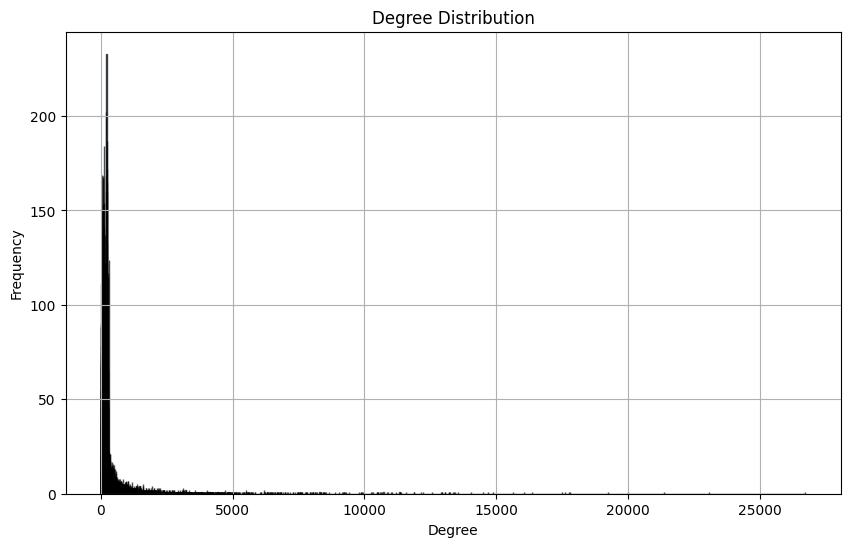

Number of connected components: 1
Number of nodes in the largest component: 27883


In [11]:
import matplotlib.pyplot as plt
import networkx as nx

# Calculate degree distribution
degree_distribution = [d for n, d in G1.degree()]

# Plot the degree distribution
plt.figure(figsize=(10, 6))
plt.hist(degree_distribution, bins=range(min(degree_distribution), max(degree_distribution) + 1), edgecolor='black', alpha=0.7)
plt.title('Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Calculate the number of connected components
connected_components = list(nx.connected_components(G1))
num_connected_components = len(connected_components)

# Calculate the number of nodes in the largest connected component
largest_component = max(connected_components, key=len)
num_nodes_in_largest_component = len(largest_component)

# Print results
print(f"Number of connected components: {num_connected_components}")
print(f"Number of nodes in the largest component: {num_nodes_in_largest_component}")

In [12]:
import networkx as nx
import random

# Define the number of nodes and the connection probability
num_nodes = 27883
connection_prob = 0.01

# Generate a random network using NetworkX and rename it to R1
R1 = nx.erdos_renyi_graph(n=num_nodes, p=connection_prob)

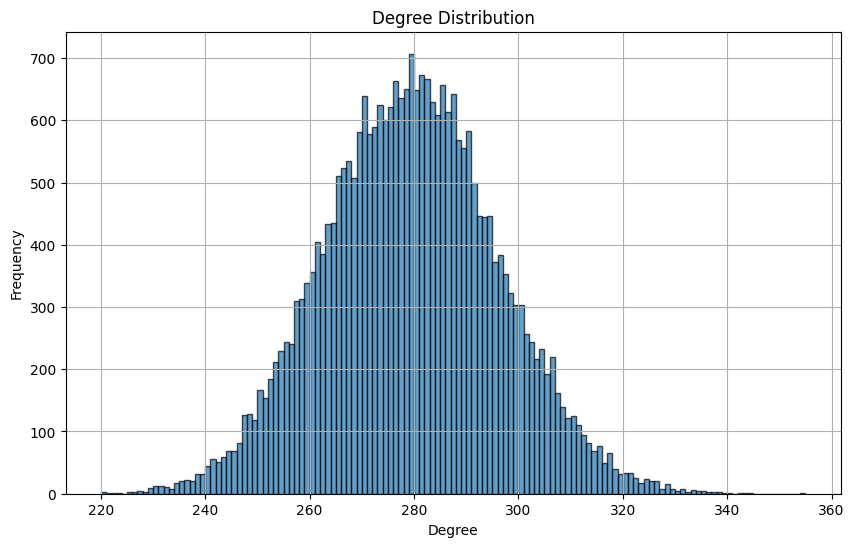

Number of connected components: 1
Number of nodes in the largest component: 27883


In [13]:
import pandas as pd
import networkx as nx
from itertools import combinations
import random
from tqdm import tqdm
import matplotlib.pyplot as plt

# Calculate degree distribution
degree_distribution = [d for n, d in R1.degree()]

# Plot the degree distribution graph
plt.figure(figsize=(10, 6))
plt.hist(degree_distribution, bins=range(min(degree_distribution), max(degree_distribution) + 1), edgecolor='black', alpha=0.7)
plt.title('Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Calculate the number of connected components
connected_components = list(nx.connected_components(R1))
num_connected_components = len(connected_components)

# Calculate the number of nodes in the largest connected component
largest_component = max(connected_components, key=len)
num_nodes_in_largest_component = len(largest_component)

# Print results
print(f"Number of connected components: {num_connected_components}")
print(f"Number of nodes in the largest component: {num_nodes_in_largest_component}")

In [14]:
import pandas as pd
import networkx as nx
from itertools import combinations
import random
from tqdm import tqdm

# Define the file path
file_path = 'video_editors.csv'

# Initialize an empty network graph
G2 = nx.Graph()

# Define a dictionary to map editor names to graph nodes
editor_to_node = {}

def get_or_create_node(editor):
    if editor not in editor_to_node:
        # Create a new node for each unique editor
        node_id = len(editor_to_node)  # Use the current dictionary length as the node ID
        editor_to_node[editor] = node_id
        G2.add_node(node_id)  # Add the node to the graph
    return editor_to_node[editor]

# Define a function to process edges
def process_edges(df):
    edges_to_add = []
    for _, group in df.groupby('item'):
        editors = group['editor'].dropna().unique()
        if len(editors) > 1:
            editor_nodes = [get_or_create_node(editor) for editor in editors]
            editor_combinations = combinations(editor_nodes, 2)
            for edge in editor_combinations:
                if edge[0] is not None and edge[1] is not None:
                    edges_to_add.append(edge)
    return edges_to_add

# Set the chunk size
chunksize = 10000

# Read and process data in chunks
for chunk in tqdm(pd.read_csv(file_path, dtype={'item': str, 'editor': str}, chunksize=chunksize), desc="Processing chunks"):
    chunk = chunk[chunk['editor'].notna()]  # Remove empty editors
    chunk = chunk[chunk['editor'].str.strip() != '']  # Remove blank string editors
    edges = process_edges(chunk)
    if edges:
        G2.add_edges_from(edges)

Processing chunks: 197it [00:29,  6.68it/s]


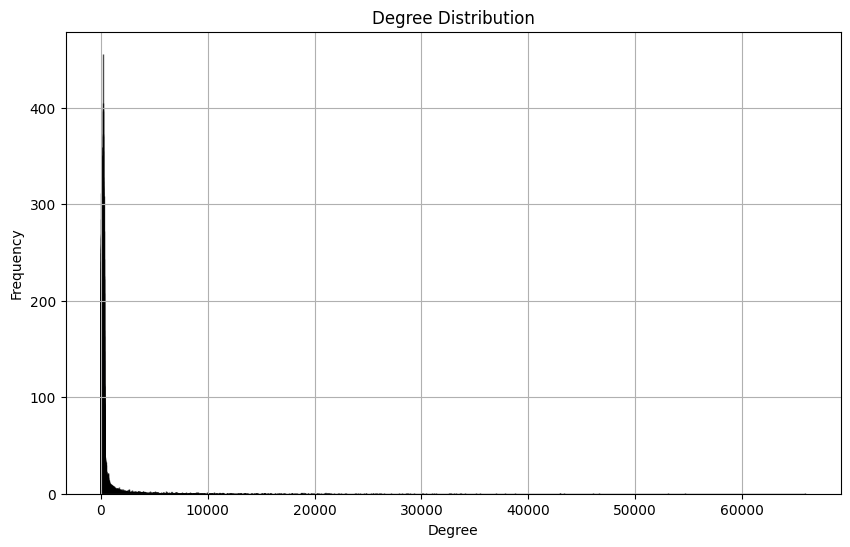

Number of connected components: 2
Number of nodes in the largest component: 68739


In [15]:
import matplotlib.pyplot as plt
import networkx as nx

# Calculate degree distribution
degree_distribution = [d for n, d in G2.degree()]

# Plot the degree distribution graph
plt.figure(figsize=(10, 6))
plt.hist(degree_distribution, bins=range(min(degree_distribution), max(degree_distribution) + 1), edgecolor='black', alpha=0.7)
plt.title('Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Calculate the number of connected components
connected_components = list(nx.connected_components(G2))
num_connected_components = len(connected_components)

# Calculate the number of nodes in the largest connected component
largest_component = max(connected_components, key=len)
num_nodes_in_largest_component = len(largest_component)

# Print results
print(f"Number of connected components: {num_connected_components}")
print(f"Number of nodes in the largest component: {num_nodes_in_largest_component}")

In [16]:
import networkx as nx
import random

# Define the number of nodes and the connection probability
num_nodes = 68741
connection_prob = 0.01

# Generate a random network using NetworkX and rename it to R2
R2 = nx.erdos_renyi_graph(n=num_nodes, p=connection_prob)

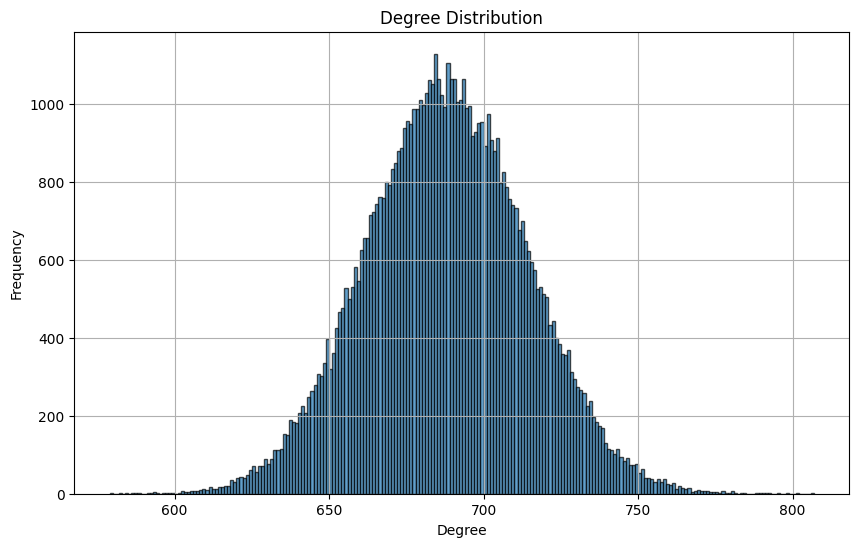

Number of connected components: 1
Number of nodes in the largest component: 68741


In [17]:
import matplotlib.pyplot as plt
import networkx as nx

# Calculate degree distribution
degree_distribution = [d for n, d in R2.degree()]

# Plot the degree distribution graph
plt.figure(figsize=(10, 6))
plt.hist(degree_distribution, bins=range(min(degree_distribution), max(degree_distribution) + 1), edgecolor='black', alpha=0.7)
plt.title('Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Calculate the number of connected components
connected_components = list(nx.connected_components(R2))
num_connected_components = len(connected_components)

# Calculate the number of nodes in the largest connected component
largest_component = max(connected_components, key=len)
num_nodes_in_largest_component = len(largest_component)

# Print results
print(f"Number of connected components: {num_connected_components}")
print(f"Number of nodes in the largest component: {num_nodes_in_largest_component}")

In [18]:
import pandas as pd
import networkx as nx
from itertools import combinations
import random
from tqdm import tqdm

# Define the file path
file_path = 'image_editors.csv'

# Initialize an empty network graph
G3 = nx.Graph()

# Define a dictionary to map editor names to graph nodes
editor_to_node = {}

def get_or_create_node(editor):
    if editor not in editor_to_node:
        # Create a new node for each unique editor
        node_id = len(editor_to_node)  # Use the current dictionary length as the node ID
        editor_to_node[editor] = node_id
        G3.add_node(node_id)  # Add the node to the graph
    return editor_to_node[editor]

# Define a function to process edges
def process_edges(df):
    edges_to_add = []
    for _, group in df.groupby('item'):
        editors = group['editor'].dropna().unique()
        if len(editors) > 1:
            editor_nodes = [get_or_create_node(editor) for editor in editors]
            editor_combinations = combinations(editor_nodes, 2)
            for edge in editor_combinations:
                if edge[0] is not None and edge[1] is not None:
                    edges_to_add.append(edge)
    return edges_to_add

# Set the chunk size
chunksize = 10000

# Read and process data in chunks
for chunk in tqdm(pd.read_csv(file_path, dtype={'item': str, 'editor': str}, chunksize=chunksize), desc="Processing chunks"):
    chunk = chunk[chunk['editor'].notna()]  # Remove empty editors
    chunk = chunk[chunk['editor'].str.strip() != '']  # Remove blank string editors
    edges = process_edges(chunk)
    if edges:
        G3.add_edges_from(edges)

Processing chunks: 744it [02:04,  5.99it/s]


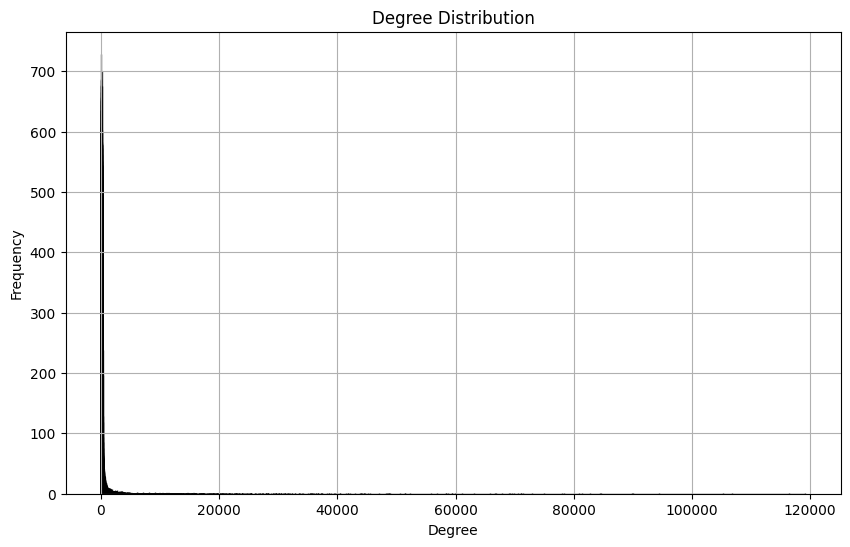

Number of connected components: 3
Number of nodes in the largest component: 125701


In [19]:
import matplotlib.pyplot as plt
import networkx as nx

# Calculate degree distribution
degree_distribution = [d for n, d in G3.degree()]

# Plot the degree distribution graph
plt.figure(figsize=(10, 6))
plt.hist(degree_distribution, bins=range(min(degree_distribution), max(degree_distribution) + 1), edgecolor='black', alpha=0.7)
plt.title('Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Calculate the number of connected components
connected_components = list(nx.connected_components(G3))
num_connected_components = len(connected_components)

# Calculate the number of nodes in the largest connected component
largest_component = max(connected_components, key=len)
num_nodes_in_largest_component = len(largest_component)

# Print results
print(f"Number of connected components: {num_connected_components}")
print(f"Number of nodes in the largest component: {num_nodes_in_largest_component}")

In [20]:
import networkx as nx
import random

# Define the number of nodes and the connection probability
num_nodes = 125705
connection_prob = 0.01

# Generate a random network using NetworkX and rename it to R3
R3 = nx.erdos_renyi_graph(n=num_nodes, p=connection_prob)

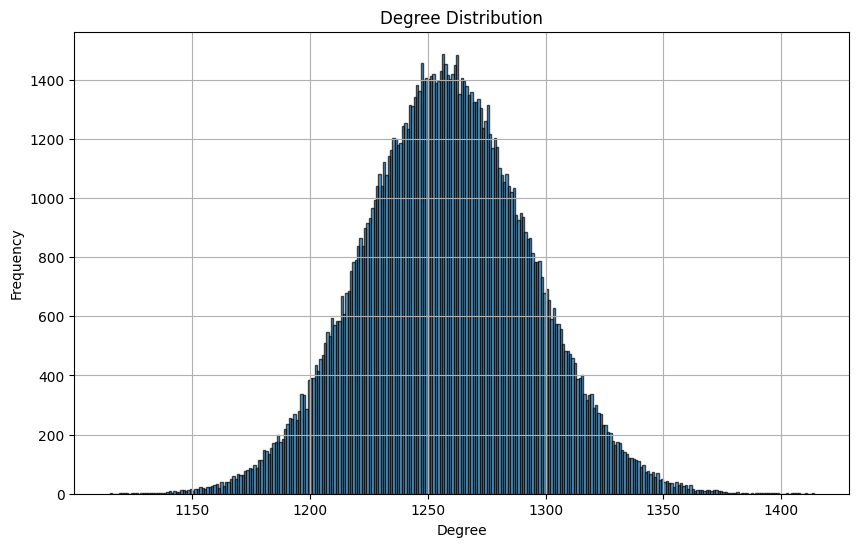

Number of connected components: 1
Number of nodes in the largest component: 125705


In [21]:
import matplotlib.pyplot as plt
import networkx as nx

# Calculate degree distribution
degree_distribution = [d for n, d in R3.degree()]

# Plot the degree distribution graph
plt.figure(figsize=(10, 6))
plt.hist(degree_distribution, bins=range(min(degree_distribution), max(degree_distribution) + 1), edgecolor='black', alpha=0.7)
plt.title('Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Calculate the number of connected components
connected_components = list(nx.connected_components(R3))
num_connected_components = len(connected_components)

# Calculate the number of nodes in the largest connected component
largest_component = max(connected_components, key=len)
num_nodes_in_largest_component = len(largest_component)

# Print results
print(f"Number of connected components: {num_connected_components}")
print(f"Number of nodes in the largest component: {num_nodes_in_largest_component}")